In [1]:
#IMPORT LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import dataset

In [2]:
data = pd.read_csv('tennis.csv')
data

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   outlook   14 non-null     object
 1   temp      14 non-null     object
 2   humidity  14 non-null     object
 3   windy     14 non-null     bool  
 4   play      14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [4]:
data.describe()

,outlook,temp,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,sunny,mild,high,False,yes
freq,5,6,7,8,9


In [5]:
print(data['play'].unique())

['no' 'yes']


In [6]:
from sklearn.preprocessing import LabelEncoder
for col in ['outlook','temp','humidity','windy','play']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['outlook'],data['temp'],data['humidity'],data['windy'],data['play'])

0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13    1
Name: outlook, dtype: int32 0      hot
1      hot
2      hot
3     mild
4     cool
5     cool
6     cool
7     mild
8     cool
9     mild
10    mild
11    mild
12     hot
13    mild
Name: temp, dtype: object 0       high
1       high
2       high
3       high
4     normal
5     normal
6     normal
7       high
8     normal
9     normal
10    normal
11      high
12    normal
13      high
Name: humidity, dtype: object 0     False
1      True
2     False
3     False
4     False
5      True
6      True
7     False
8     False
9     False
10     True
11     True
12    False
13     True
Name: windy, dtype: bool 0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: play, dtype: object
0     2
1     2
2     0
3     1
4     1
5     1
6     0
7     2
8     2
9     1
10    2
11    0
12    0
13   

# Prepocessing data

In [7]:
data

,outlook,temp,humidity,windy,play
0,2,1,0,0,0
1,2,1,0,1,0
2,0,1,0,0,1
3,1,2,0,0,1
4,1,0,1,0,1
5,1,0,1,1,0
6,0,0,1,1,1
7,2,2,0,0,0
8,2,0,1,0,1
9,1,2,1,0,1


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   outlook   14 non-null     int32
 1   temp      14 non-null     int32
 2   humidity  14 non-null     int32
 3   windy     14 non-null     int64
 4   play      14 non-null     int32
dtypes: int32(4), int64(1)
memory usage: 468.0 bytes


# menentukan variabel x dan y

In [9]:
#data x dan y nya
x = data.drop('play', axis = 1)
y = data["play"]

# data training dan testing

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [11]:
print(x_train)

    outlook  temp  humidity  windy
13        1     2         0      1
9         1     2         1      0
1         2     1         0      1
7         2     2         0      0
10        2     2         1      1
3         1     2         0      0
0         2     1         0      0
5         1     0         1      1
12        0     1         1      0


In [12]:
print(y_train)

13    0
9     1
1     0
7     0
10    1
3     1
0     0
5     0
12    1
Name: play, dtype: int32


In [13]:
print (x_test)

    outlook  temp  humidity  windy
8         2     0         1      0
6         0     0         1      1
4         1     0         1      0
11        0     2         0      1
2         0     1         0      0


In [14]:
print (y_test)

8     1
6     1
4     1
11    1
2     1
Name: play, dtype: int32


# Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB
model_Nb = GaussianNB()
model_Nb = model_Nb.fit(x_train, y_train)

In [16]:
predict = model_Nb.predict(x_test)

In [17]:
from sklearn.metrics import accuracy_score
print ("akurasi scorenya sebesar: ", accuracy_score(y_test, predict)*100)

akurasi scorenya sebesar:  40.0


In [18]:
x_baru = ([[0,0,0,0]])

In [19]:
prediksi_baru = model_Nb.predict(x_baru)
print(prediksi_baru)

[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


# Decission Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier
model_DT = DecisionTreeClassifier(max_depth=2)
model_DT.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [21]:
predict_DT = model_DT.predict(x_test)

In [22]:
from sklearn.metrics import accuracy_score
print ("akurasinya sebesar: ", accuracy_score(y_test, predict)*100)

akurasinya sebesar:  40.0


In [23]:
x_baru_DT = ([[0,2,1,0]])

In [24]:
prediksi_baru_DT = model_DT.predict(x_baru_DT)
print(prediksi_baru_DT)

[1]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# Visualisasi Data Decission Tree

<function matplotlib.pyplot.show(close=None, block=None)>

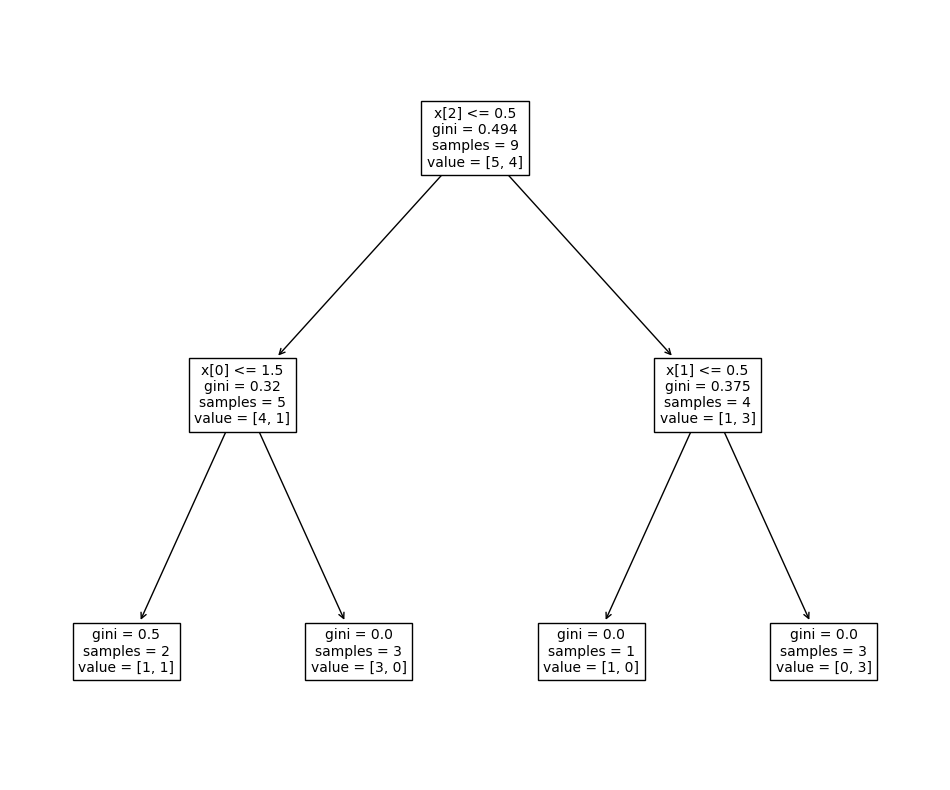

In [25]:
from sklearn.tree import plot_tree
plt.subplots(figsize = (12,10))
plot_tree (model_DT, fontsize = 10)
plt.show

# Import dataset iris.csv

In [26]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [28]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [29]:
print(data['Species'].unique())

['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [30]:
from sklearn.preprocessing import LabelEncoder
for col in ['Id','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    data
    print (data['Id'],data['SepalLengthCm'],data['SepalWidthCm'],data['PetalLengthCm'],data['PetalWidthCm'],data['Species'])

0        0
1        1
2        2
3        3
4        4
      ... 
145    145
146    146
147    147
148    148
149    149
Name: Id, Length: 150, dtype: int64 0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: SepalLengthCm, Length: 150, dtype: float64 0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: SepalWidthCm, Length: 150, dtype: float64 0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: PetalLengthCm, Length: 150, dtype: float64 0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: PetalWidthCm, Length: 150, dtype: float64 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris

# Data Training danTesting

In [31]:
#Membagi dataset mnjadi data pelatihan(80%) & data uji (20%)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# KNN

In [32]:
#Import Library
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [33]:
knn = KNeighborsClassifier(n_neighbors=3)

In [34]:
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [35]:
y_pred = knn.predict(x_test)

In [36]:
accuracy = accuracy_score(y_test, y_pred)
print("Akurasi model KNN: ", accuracy)

Akurasi model KNN:  1.0


# data latih

In [37]:
x_baru_pred = ([[5.1,3.5,1.4,0.2]])

In [38]:
prediksi_baru_pred = knn.predict(x_baru_pred)
print(prediksi_baru_pred)

[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [39]:
x_baru_pred = ([[6.2,3.4,5.4,2.3]])

In [41]:
prediksi_baru_pred = knn.predict(x_baru_pred)
print(prediksi_baru_pred)

[1]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


# data uji

In [42]:
x_baru_pred = ([[5.2,3.1,5.4,1.9]])

In [43]:
prediksi_baru_pred = knn.predict(x_baru_pred)
print(prediksi_baru_pred)

[1]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
x_baru_pred = ([[6.2,3.1,5.2,2.0]])

In [45]:
prediksi_baru_pred = knn.predict(x_baru_pred)
print(prediksi_baru_pred)

[1]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [46]:
x_baru_pred = ([[4.2,3.0,1.2,2.0]])

In [47]:
prediksi_baru_pred = knn.predict(x_baru_pred)
print(prediksi_baru_pred)

[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [48]:
x_baru_pred = ([[4.7,3.0,2.2,2.5]])

In [49]:
prediksi_baru_pred = knn.predict(x_baru_pred)
print(prediksi_baru_pred)

[0]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
